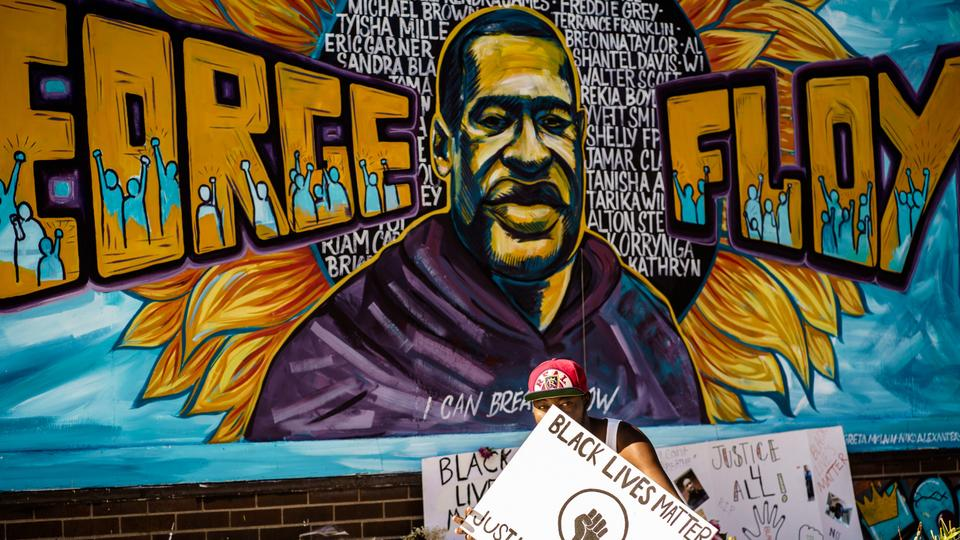

## Sentiment Analysis (Text Mining)


***\"My argument was not that what happens on that social media website is broadly representative of popular opinion but that what happens on Twitter is a good barometer of enthusiasm around movement\-building and fandoms.\"\-Charlie Warzel\-New York Times***

There are crazy things happening all around the world: Covid-19, shattered economies, George Floyd protests... I was especially interested in the blacklives matter movement and how it spread across the country and abroad in a very short time. The role Twitter has played was significant. The whole country was in turmoil. While all this happening, I was wondering if I could find any pattern in the tweets about the George Floyd incident. Could I find out how people were feeling by just looking at the tweets? What are the most popular ideas about the incident?  Curiously, I pulled the most popular tweets posted between 06-01-2020 and 07-25-2020 that include the word "Floyd" in it. I applied some NLP methods such as Bag of Words, Term Frequency-Inverse Document frequency,Name Entity Recognition, Polarity-Subjectivity calculation.

The steps are;

1. Importing NLP Modules
2. Accessing Twitter API
3. Scraping Tweets
4. Cleaning tweets
5. Sentiment Analysis: Bag of Words/ Term Frequency Model/ Hashtags and Mentions/ Polarity-Subjectivity Scores

### 1. Importing NLP libraries and modules

In [2]:
# Importing main libraries

import os
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Importing Natural Language Processing libraries

import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from textblob import TextBlob

#Regular expressions

import re

# General Settings

sns.set()
os.chdir("/Users/salih/Documents/pythonwork")
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns',4)

### 2. Accessing Twitter API

In [3]:
# @hidden_cell
# Twitter keys (masked for privacy reasons)
consumer_key = "XxXXXXXXXXXXXXXXXXXXX"
consumer_secret = "XxXXXXXXXXXXXXXXXXXXX"
access_token = "XxXXXXXXXXXXXXXXXXXXX"
access_token_secret = "XxXXXXXXXXXXXXXXXXXXX"

# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)

# Creating the API object while passing in auth information
api = tweepy.API(auth) 


### 3. Search Twitter for popular tweets about "George Floyd"
* **A. Pulling tweets from one single day**

I am pulling all the popular tweets posted between June 15 and July 25, 2020 that contains "Floyd". Twitter is proposing two restrictions that I couldn't find a way around.

1. The search index has a 7-day limit. No tweets will be found for a date older than one week.
2. It is allowing only 15 popular tweets for any given day.

In [4]:
# The search term you want to find
query = "Floyd"

# Language code
language = "en"

# Calling the search function with our parameters
results = api.search(q=query, lang=language,count=100,result_type="popular",until="2020-07-25")

# Printing the first five tweets along with usernames
for tweet in results[0:5]:
    print(tweet.user.name,"Tweeted:",tweet.text)

Ryan Fournier Tweeted: Since the death of George Floyd,

18 police officers have been killed in the line of duty with close to 1,000 injur… https://t.co/lmXsYPymlC
Mike Baker Tweeted: A terrifying court ruling here: A judge in Seattle has ordered that media outlets must turn over images and footage… https://t.co/NgF1CsyDVD
Mark Dice Tweeted: They burnt a man alive inside a store for George Floyd. https://t.co/vDsYr8HndI
Bleacher Report Tweeted: Paul George honors Breonna Taylor and George Floyd while telling media he’s only going to speak on social change https://t.co/4has7fnAE0
New York Post Tweeted: Body found in Minneapolis pawnshop that was torched in George Floyd protests https://t.co/lBq3mKGAhJ https://t.co/L46GBXNTHl


* **B. Pulling popular tweets from three different time periods**

Since we can't retrieve any tweet older than a week, I stored all the tweets in a data frame so that I can bring out whenever I want to analyze. The algorithm below retrieves popular tweets between any given two dates and saves it into a csv file. We see below that there are 30 columns. We never think about this but extensive amount of information is being recorded for each tweet: date, source, favorite_count, retweet_count, lang, place... 

In [53]:
# Storing all popular tweets between June 12th and June 21st in a list.
pop_tweets2=[]
start_date = datetime.date(2020, 6, 12)
end_date = datetime.date(2020, 6, 21)
delta = datetime.timedelta(days=1)

while start_date <= end_date:
    start_date += delta
    results= api.search(q=query, lang=language,count=100,result_type="popular",until=start_date)
    for tweet in results:
        pop_tweets2.append(tweet._json)

# Convert the list of tweets to a data frame and store it in the local drive.
pop_tweets_df2=pd.DataFrame(pop_tweets2)
pop_tweets_df2.to_csv("tweet_data2")

In [43]:
# Storing all popular tweets between June 26th to Jul 4th in a list.
pop_tweets3=[]
start_date = datetime.date(2020, 6, 26)
end_date = datetime.date(2020, 7, 3)
delta = datetime.timedelta(days=1)

while start_date <= end_date:
    start_date += delta
    results= api.search(q=query, lang=language,count=100,result_type="popular",until=start_date,tweet_mode='extended')
    for tweet in results:
        pop_tweets3.append(tweet._json)

# Convert the list of tweets to a data frame and store it in the local drive.
pop_tweets_df3=pd.DataFrame(pop_tweets3)
pop_tweets_df3.to_csv("tweet_data3")

In [6]:
# Storing all popular tweets between July 6th to July 15th in a list.
pop_tweets4=[]
start_date = datetime.date(2020, 7, 6)
end_date = datetime.date(2020, 7, 15)
delta = datetime.timedelta(days=1)

while start_date <= end_date:
    start_date += delta
    results= api.search(q=query, lang=language,count=100,result_type="popular",until=start_date,tweet_mode='extended')
    for tweet in results:
        pop_tweets4.append(tweet._json)

# Convert the list of tweets to a data frame and store it in the local drive.
pop_tweets_df4=pd.DataFrame(pop_tweets4)
pop_tweets_df4.to_csv("tweet_data4")

In [4]:
# Storing all popular tweets between July 16th to July 25th in a list.
pop_tweets5=[]
start_date = datetime.date(2020, 7, 16)
end_date = datetime.date(2020, 7, 25)
delta = datetime.timedelta(days=1)

while start_date <= end_date:
    start_date += delta
    results= api.search(q=query, lang=language,count=100,result_type="popular",until=start_date,tweet_mode='extended')
    for tweet in results:
        pop_tweets5.append(tweet._json)

# Convert the list of tweets to a data frame and store it in the local drive.
pop_tweets_df5=pd.DataFrame(pop_tweets5)
pop_tweets_df5.to_csv("tweet_data5")

In [8]:
# Concatenating all tweets
tweet_data2=pd.read_csv("tweet_data2")
tweet_data3=pd.read_csv("tweet_data3")
tweet_data4=pd.read_csv("tweet_data4")
tweet_data3.rename({"full_text":"text"},axis=1,inplace=True)
tweet_data3.drop(["display_text_range"],axis=1,inplace=True)
tweet_data4.rename({"full_text":"text"},axis=1,inplace=True)
tweet_data4.drop(["display_text_range"],axis=1,inplace=True)
tweet_data5=pd.read_csv("tweet_data5")
tweet_data5.rename({"full_text":"text"},axis=1,inplace=True)
tweet_data5.drop(["display_text_range"],axis=1,inplace=True)
all_tweets=pd.concat([tweet_data2,tweet_data3,tweet_data4,tweet_data5],ignore_index=True)

/Users/salih/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [9]:
# A quick look at the dataset all_tweets
print(all_tweets[["favorite_count","text","retweet_count"]].head())
print('_'*70)
print("All columns:",all_tweets.columns)
print(all_tweets.shape)

   favorite_count  \
0  86185            
1  10519            
2  26109            
3  7043             
4  23404            

                                                                                                                                             text  \
0  Someone inform @JoeBiden not to compare the death of Dr. King and George Floyd. He has been in office a very long t… https://t.co/FPII4VZz4j     
1  I feel like some ppl have taken the George Floyd funeral‘s, BLM murals, no knock warrant suspensions and brand stat… https://t.co/2HVFQnL3fP     
2  Al Sharpton and the rest of the do nothing Democrats do not represent all black people. Look at how they  hijacked… https://t.co/izhyz5THY9      
3  “the autonomous zone has the right to reject you”\n\nA citizen of #CHAZ yells at a street preacher being held down by… https://t.co/X59A2QmQqV   
4  USA TODAY examined 32 fatal police encounters in which victims said they couldn’t breathe while being restrained. A… https://

### 4. Cleaning Tweets

The dates we used in api search are overlapping. It is possible that there are some tweets were popular over multiple days and therefore appearing multiple times in our data set.



In [10]:
# How many different tweets are there?
unique_tweets=set()

for i in range(all_tweets.shape[0]):
    unique_tweets.add(all_tweets["id"][i])

# Only 327 of the 657 tweets have a unique ID.     
len(unique_tweets)

250

In [11]:
#Checking the duplicated rows-tweets
all_tweets.loc[all_tweets.duplicated(["id"]),"text"]

18     Someone inform @JoeBiden not to compare the death of Dr. King and George Floyd. He has been in office a very long t… https://t.co/FPII4VZz4j                                                                                                                                                                
20     I feel like some ppl have taken the George Floyd funeral‘s, BLM murals, no knock warrant suspensions and brand stat… https://t.co/2HVFQnL3fP                                                                                                                                                                
22     Al Sharpton and the rest of the do nothing Democrats do not represent all black people. Look at how they  hijacked… https://t.co/izhyz5THY9                                                                                                                                                                 
23     “the autonomous zone has the right to reject you”\n\nA citizen of #CH

In [12]:
#There are a total of 30 variables. I will keep only the ones I may use in my analysis.
subset=all_tweets.loc[:,['created_at','text','favorite_count','retweet_count']]
subset=subset.drop_duplicates().copy()
subset.head(10)

,created_at,text,favorite_count,retweet_count
0,Sat Jun 13 18:23:51 +0000 2020,Someone inform @JoeBiden not to compare the death of Dr. King and George Floyd. He has been in office a very long t… https://t.co/FPII4VZz4j,86185,29856
1,Sat Jun 13 20:20:57 +0000 2020,"I feel like some ppl have taken the George Floyd funeral‘s, BLM murals, no knock warrant suspensions and brand stat… https://t.co/2HVFQnL3fP",10519,3231
2,Sat Jun 13 13:14:50 +0000 2020,Al Sharpton and the rest of the do nothing Democrats do not represent all black people. Look at how they hijacked… https://t.co/izhyz5THY9,26109,8278
3,Sat Jun 13 20:02:03 +0000 2020,“the autonomous zone has the right to reject you”\n\nA citizen of #CHAZ yells at a street preacher being held down by… https://t.co/X59A2QmQqV,7043,4959
4,Sat Jun 13 11:12:05 +0000 2020,USA TODAY examined 32 fatal police encounters in which victims said they couldn’t breathe while being restrained. A… https://t.co/E4pIXQERvA,23404,14942
5,Sat Jun 13 12:00:00 +0000 2020,"George Floyd's murder is the only latest in an endless series of police killings. \n\nEric Garner, Sandra Bland, Laqu… https://t.co/PeIx2S9v7w",11329,3572
6,Sat Jun 13 15:40:05 +0000 2020,"On any given day, the protesters spill out onto the streets.\n\nThey march. They kneel. They sing.\n\nThey cry. They pr… https://t.co/brJa2D0qMD",2837,1034
7,Sat Jun 13 17:11:01 +0000 2020,This is beautiful. Thankful to my Sorors of @akasorority1908 for providing scholarships to George Floyd’s daughter… https://t.co/rQS0Mjv43Z,6603,1314
8,Sat Jun 13 13:00:00 +0000 2020,George Floyd's 6-year-old daughter was just offered a full-ride scholarship to Texas Southern University. https://t.co/4ZKyi7iqNu,9035,1520
9,Sat Jun 13 17:11:00 +0000 2020,"George Floyd protests reached deep into rural California. The reactions were mixed, sometimes scary https://t.co/wH98ro2m6w",1345,639


In [13]:
#Most favorited tweets
subset.sort_values(by="favorite_count",ascending=False).head(3)

,created_at,text,favorite_count,retweet_count
61,Wed Jun 17 21:20:44 +0000 2020,George Floyd: high on fentanyl and trying to use a counterfeit bill after 9 prison stints.\n\nRayshard Brooks: drunk-… https://t.co/mAm6cCdg1x,142211,48844
17,Sun Jun 14 13:31:58 +0000 2020,Why would anyone accept the premise that if you “don’t run away” or “don’t resist arrest” at the hands of police th… https://t.co/8qhydhY1ry,103644,28170
15,Sun Jun 14 15:24:40 +0000 2020,"""If the other three police officers who were standing around when George Floyd was murdered had thought about inter… https://t.co/OaFs98iMGh",87842,27328


In [14]:
#Most retweeted tweets
subset.sort_values(by="retweet_count",ascending=False).head(3)

,created_at,text,favorite_count,retweet_count
61,Wed Jun 17 21:20:44 +0000 2020,George Floyd: high on fentanyl and trying to use a counterfeit bill after 9 prison stints.\n\nRayshard Brooks: drunk-… https://t.co/mAm6cCdg1x,142211,48844
0,Sat Jun 13 18:23:51 +0000 2020,Someone inform @JoeBiden not to compare the death of Dr. King and George Floyd. He has been in office a very long t… https://t.co/FPII4VZz4j,86185,29856
17,Sun Jun 14 13:31:58 +0000 2020,Why would anyone accept the premise that if you “don’t run away” or “don’t resist arrest” at the hands of police th… https://t.co/8qhydhY1ry,103644,28170


### 5. Sentiment Analysis
#### a) Tokenization

As a simple model, Bag of Words  takes only frequency into account and ignores word order and grammar. It provides an overview of a document, ignoring its details. That is why it is commonly used for topic identification. I will experiment with more complicated models which not only concerns with whether some words occur in the document, but also occurs where in the document.

In [15]:
#Tokenizing tweets.
tknzr=TweetTokenizer()
listoftweets=[tweet for tweet in subset["text"]]
tweet_words=[tknzr.tokenize(t) for t in listoftweets]
print(tweet_words[0:3])

print("-"*117)
#Extracting from the list object
all_tweets_combined2=[]
for l in tweet_words:
    for item in range(0,len(l)):
        all_tweets_combined2.append(l[item])
print(all_tweets_combined2[0:20])

[['Someone', 'inform', '@JoeBiden', 'not', 'to', 'compare', 'the', 'death', 'of', 'Dr', '.', 'King', 'and', 'George', 'Floyd', '.', 'He', 'has', 'been', 'in', 'office', 'a', 'very', 'long', 't', '…', 'https://t.co/FPII4VZz4j'], ['I', 'feel', 'like', 'some', 'ppl', 'have', 'taken', 'the', 'George', 'Floyd', 'funeral', '‘', 's', ',', 'BLM', 'murals', ',', 'no', 'knock', 'warrant', 'suspensions', 'and', 'brand', 'stat', '…', 'https://t.co/2HVFQnL3fP'], ['Al', 'Sharpton', 'and', 'the', 'rest', 'of', 'the', 'do', 'nothing', 'Democrats', 'do', 'not', 'represent', 'all', 'black', 'people', '.', 'Look', 'at', 'how', 'they', 'hijacked', '…', 'https://t.co/izhyz5THY9']]
---------------------------------------------------------------------------------------------------------------------
['Someone', 'inform', '@JoeBiden', 'not', 'to', 'compare', 'the', 'death', 'of', 'Dr', '.', 'King', 'and', 'George', 'Floyd', '.', 'He', 'has', 'been', 'in']


In [16]:
# A function for counting words
def counter(to_count):
    counts={}
    for word in to_count:
        if word in counts.keys():
            counts[word]=counts[word]+1
        else:
            counts[word]=1
    return counts

#### b) Extracting Mentions and Hashtags

In [17]:
#Extracting mentions and hashtags using regular expressions
hashtags=[]
for word in all_tweets_combined2:
    if bool(re.match(r"[#@]\w+",word)):
        hashtags.append(word)
print(hashtags)

['@JoeBiden', '#CHAZ', '@akasorority1908', '#ReleasedOnBail', '#Galveston', '@RudyGiuliani', '@SpeakerPelosi', '@chuckschumer', '@McNeilJaden', '@SpeakerPelosi', '#BlueLeaks', '@AlleenBrown', '@McNeilJaden', '@SpeakerPelosi', '#JusticeforJayarajAndFenix', '@TimScottSC', '@realDonaldTrump', '#BlackLivesMatter', '#TheFive', '#BlackLivesMatter', '@surajyengde', '#WillSmith', '#On1withAngelaRye', '@RepKarenBass', '@RedSox', '@MikeRezendes', '#BlackLivesMatter', '@surajyengde', '#BlackLivesMatter', '@JulianCastro', "#GeorgeFloyd's", '@nassercricket', '#BlackLivesMatter', '#GeorgeFloyd', '#JusticeinPolicing', '@BPCMLS', '#GeorgeFloyd', '@ThierryHenry', '#BlackLivesMatter', '@MLS', '@keithellison', '@HoganLovells', '#BlackLivesMatter', '#VidasNegrasImportam', '#Business', '#Riots', '#Florida', '#JusticeInPolicing', '#JusticeInPolicing', '@RepKarenBass', '#DemandingWomen', '@washingtonpost', '@KingJames', '@mmkelly22', '@joyceslee', '@jonswaine', '@atthar_mirza', '@ViolaDavis', '@washingtonpos

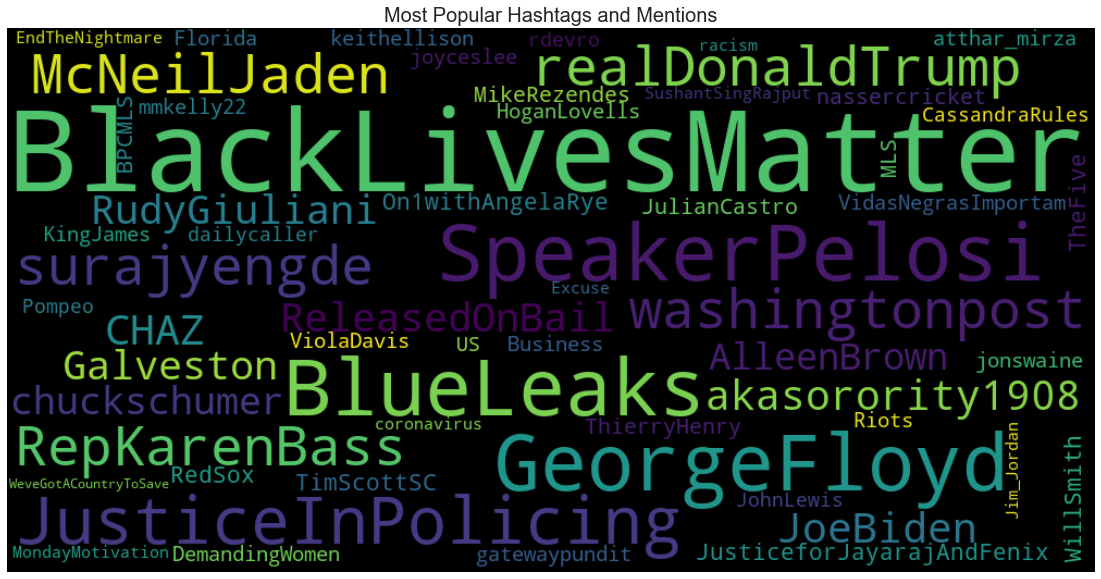

In [18]:
hashtags_text="".join(hashtags)
plt.rcParams['figure.figsize'] = [20, 10]
wc = WordCloud(random_state=4,width=1000,height=500,max_font_size=256)
wc.generate(hashtags_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title(label="Most Popular Hashtags and Mentions",fontsize=20)
plt.show()

#### c) Bag of Words

In [19]:
#Lowering all letters
all_tweets_combined2=[word.lower() for word in all_tweets_combined2]

# Excluding stop words
all_tweets_combined2=[word for word in all_tweets_combined2 if word not in stopwords.words("english")]

# Lemmatization
lemmatizer=WordNetLemmatizer()
all_tweets_combined2=[lemmatizer.lemmatize(word) for word in all_tweets_combined2]

# Only words
all_tweets_combined2=[word for word in all_tweets_combined2 if word.isalpha()]
print("After cleaning: \n\n",all_tweets_combined2[0:40])

After cleaning: 

 ['someone', 'inform', 'compare', 'death', 'dr', 'king', 'george', 'floyd', 'office', 'long', 'feel', 'like', 'ppl', 'taken', 'george', 'floyd', 'funeral', 'blm', 'mural', 'knock', 'warrant', 'suspension', 'brand', 'stat', 'al', 'sharpton', 'rest', 'nothing', 'democrat', 'represent', 'black', 'people', 'look', 'hijacked', 'autonomous', 'zone', 'right', 'reject', 'citizen', 'yell']


In [20]:
# Identifying the most common words
word_counts=counter(all_tweets_combined2)
word_counts.pop("floyd")
word_counts.pop("george")
word_counts_df=pd.DataFrame(data=word_counts.values(),index=word_counts.keys(),columns=["count"])
word_counts_df.sort_values(by="count",ascending=False,inplace=True)

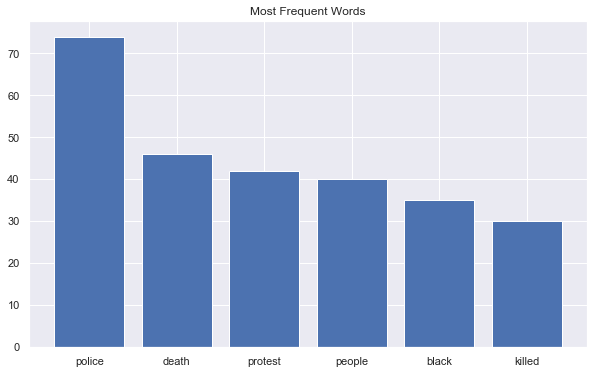

In [21]:
#Plotting most frequent words
most_frequent=word_counts_df.head(6)
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(most_frequent.index,most_frequent["count"])
plt.title("Most Frequent Words")
plt.show()

### d) Term Frequency Model

In the above model, we assume that the words are as important as the number of times they repeat. However, sometimes repetition of some words may actually mean that these words are insignificant. For example, in an astronomy-related article, the word "sky" can be very repetitive, but not as important. The Term-frequency model takes this into account by using the below formula.

Term Frequency-Inverse Document Frequency Model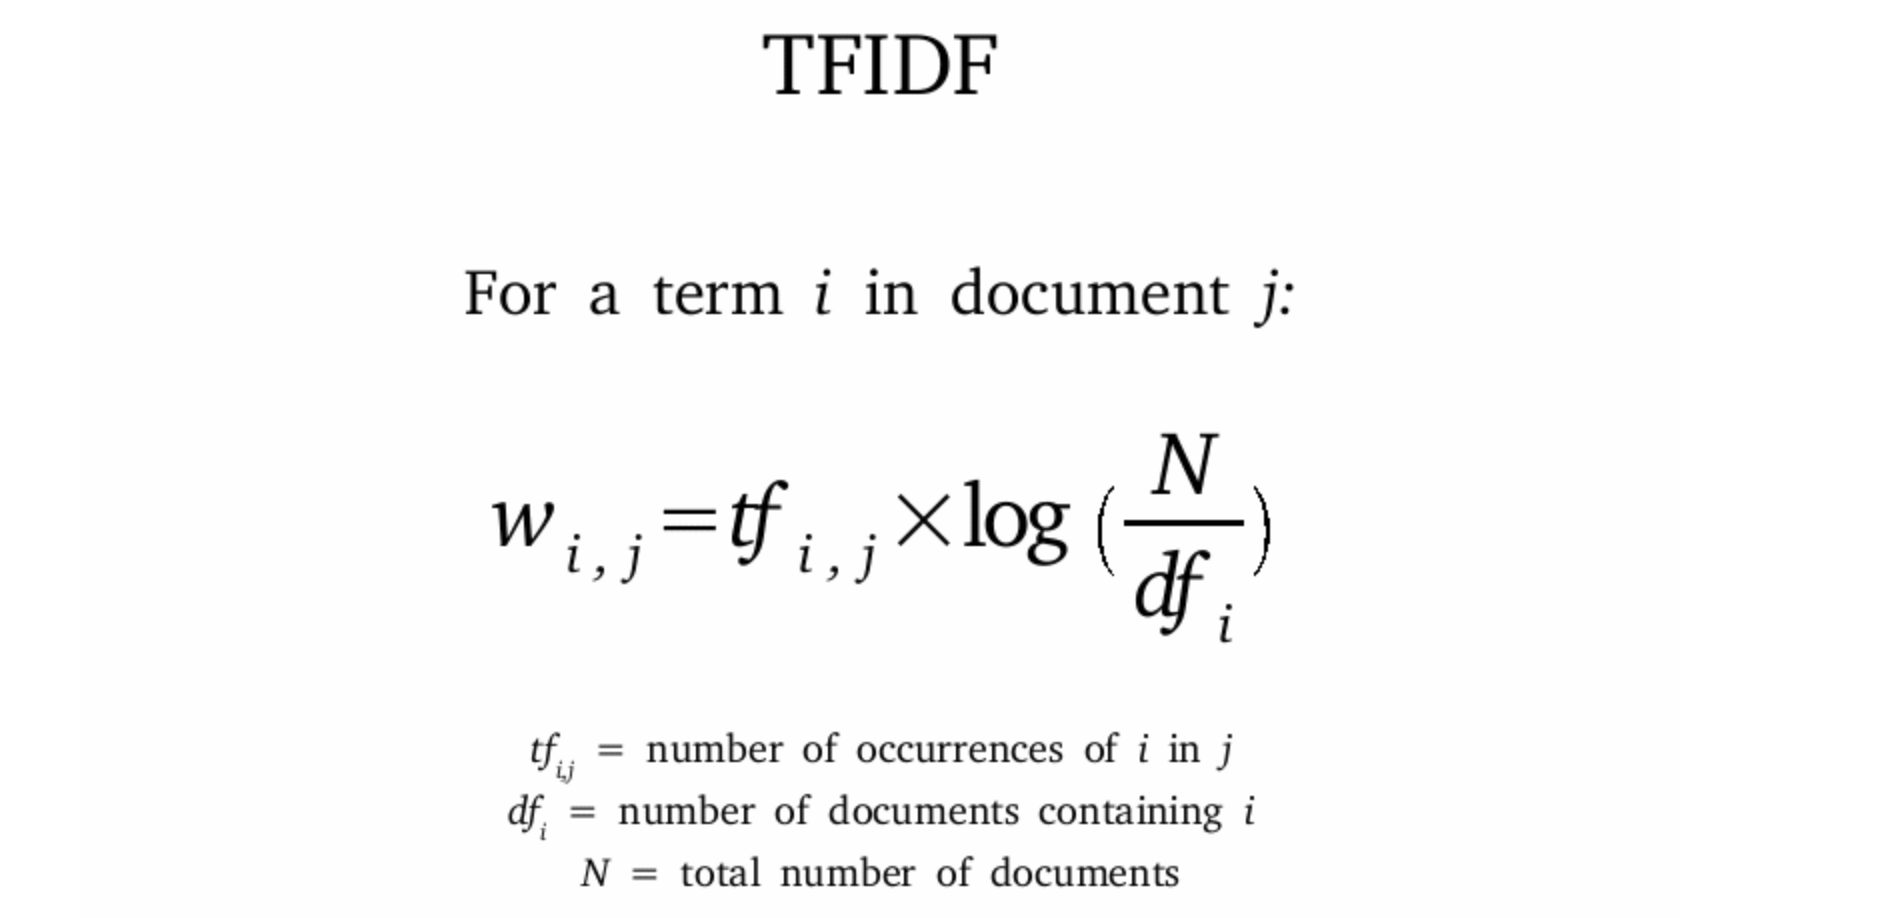

In [22]:
# Pre-processing steps on tweet_words
# Converting all to lower letter
for tweet in tweet_words:
    for i in range(len(tweet)):
        tweet[i]=tweet[i].lower()

# Removing stop words
tweet_words2=[]
for tweet in tweet_words:
    item=[word for word in tweet if word not in list(stopwords.words("english"))]
    tweet_words2.append(item)
    
# Lemmatization
tweet_words3=[]
for tweet in tweet_words2:
    item=[lemmatizer.lemmatize(word) for word in tweet]
    tweet_words3.append(item)

# Keeping only words
tweet_words4=[]
for tweet in tweet_words3:
    item=[word for word in tweet if word.isalpha()]
    tweet_words4.append(item)


In [23]:
# Importing TfidfModel to calculate word weights
from gensim.models.tfidfmodel import TfidfModel

# Importing Dictionary module to convert words to numeric vectors
from gensim.corpora import Dictionary

In [24]:
# Converting tokens to numeric vectors
dictionary=Dictionary(tweet_words4)

# At this point, all words are converted to numbers. 
racism_id=dictionary.token2id.get("racism")
print("The ID number for the word 'racism' is {}:".format(racism_id),dictionary.get(racism_id))

The ID number for the word 'racism' is 795: racism


In [25]:
# Creating Corpus: A bag of words for each tweet
corpus=[dictionary.doc2bow(tweet) for tweet in tweet_words4]

# Term frequency model
tfidf=TfidfModel(corpus)

#Storing the weight of each word relative to the frequencies
tfidf_weights=[]
for i in range(len(corpus)):
    tfidf_weights.append(tfidf[corpus[i]])

important_words=[]
for tweet in tfidf_weights:
    for weight in tweet:
        important_words.append(weight)

#Sorting by weights
important_words=sorted(important_words,key=lambda x:x[1],reverse=True)    
print(important_words[0:20])

[(1613, 0.8624329535229613), (1018, 0.8365980842382466), (175, 0.8298087741648558), (122, 0.8113337809452729), (24, 0.7870524899619435), (445, 0.7256966143601559), (255, 0.7029705088295481), (155, 0.690979178160119), (472, 0.6724921402833474), (1296, 0.6631448540135472), (289, 0.659700787775952), (1464, 0.6482228933002291), (385, 0.6220482164338966), (1068, 0.620135604231169), (419, 0.6155606858662712), (358, 0.5917024931407436), (24, 0.5904887102444516), (1080, 0.5897259233404915), (422, 0.5892721672403527), (123, 0.5803006865159159)]


In [26]:
dict_weights={}
for pair in important_words:
    if pair[0] not in dict_weights.keys():
        dict_weights[pair[0]]=[pair[1]]
    else:
        dict_weights[pair[0]].append(pair[1])

In [27]:
average={}
for key in dict_weights.keys():
    average[key]=np.mean(dict_weights[key])
    

In [28]:
average=sorted(average.items(),key=lambda x:x[1],reverse=True)

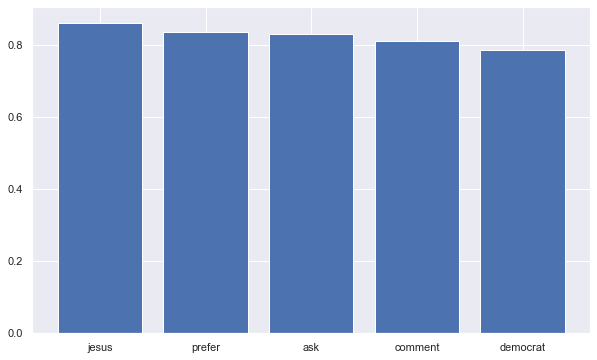

In [33]:
#Plotting most important words (words with highest weights)
imp_words=[dictionary.get(word[0]) for word in important_words]
imp_weights=[word[1] for word in important_words]

fig,ax=plt.subplots(figsize=(10,6))
ax.bar(imp_words[0:5],imp_weights[0:5])
plt.show()

### e) Polarity and Subjectivity Scores

One of the exciting function in Python that dives into common NLP tasks is TextBlob. It can accomplish a wide range of tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification. It can help us answer below questions.

1- Does sentiment of a tweet influence how many times it gets retweeted or favorited?

2- How does subjectivity change across different levels of polarity?

3- Is there a pattern with polarity over time?

4- What are the distributions of positive-negative-neutral tweets?

5- What are the most significant words in the tweets?

In [34]:
# Calculating Polarity and Subjectivity Scores
pol= lambda x: TextBlob(x).sentiment.polarity
sub= lambda x: TextBlob(x).sentiment.subjectivity
subset["subjectivity"]=subset.text.apply(sub)
subset["polarity"]=subset.text.apply(pol)

In [35]:
# Checking the most positive and negative tweets
most_positive2=subset["polarity"].nlargest(3).index
most_negative2=subset["polarity"].nsmallest(3).index

print("Most Positive Tweets:",subset.loc[most_positive2,["text"]])
print("-"*50)            
print("Most Negative Tweets:",subset.loc[most_negative2,["text"]])

Most Positive Tweets:                                                                                                                                                                                                                                                                                          text
7    This is beautiful. Thankful to my Sorors of @akasorority1908 for providing scholarships to George Floyd’s daughter… https://t.co/rQS0Mjv43Z                                                                                                                                             
292  This article from The Kansas City Star is amazing. If we’re talking about “fragility,” there can’t be any better illustration than this. A bunch of college students who profess to be scared and traumatized because someone tweeted a joke about George Floyd. https://t.co/xbYROZumib
155  Beaten to death in police custody, sexually assaulted....will we speak up for Jayaraj &amp; Fenix? Or will we conti

In [36]:
# Creating a categorical variable out of polarity Scores
subset["Tweet_Sentiment"]="Neutral"
subset.loc[subset["polarity"]<-0.10,"Tweet_Sentiment"]="Negative"
subset.loc[subset["polarity"]>0.10,"Tweet_Sentiment"]="Positive"

In [37]:
# What is the linear relationship between variables?
subset.corr()

,favorite_count,retweet_count,subjectivity,polarity
favorite_count,1.000000,0.944893,0.026843,-0.053677
retweet_count,0.944893,1.000000,0.032502,-0.082964
subjectivity,0.026843,0.032502,1.000000,0.055984
polarity,-0.053677,-0.082964,0.055984,1.000000


Text(0.5, 1.0, ' Retweet Count VS Favorite Count')

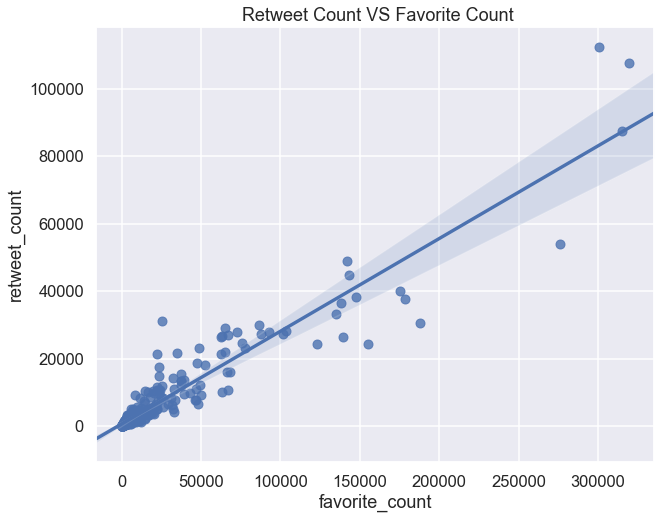

In [41]:
sns.set_context("talk")
fig,ax=plt.subplots(figsize=(10,8))
g1=sns.regplot(x="favorite_count", y="retweet_count",data=subset)
g1.set_title(" Retweet Count VS Favorite Count")

Text(0.5, 1.0, ' Polarity Score VS Subjectivity')

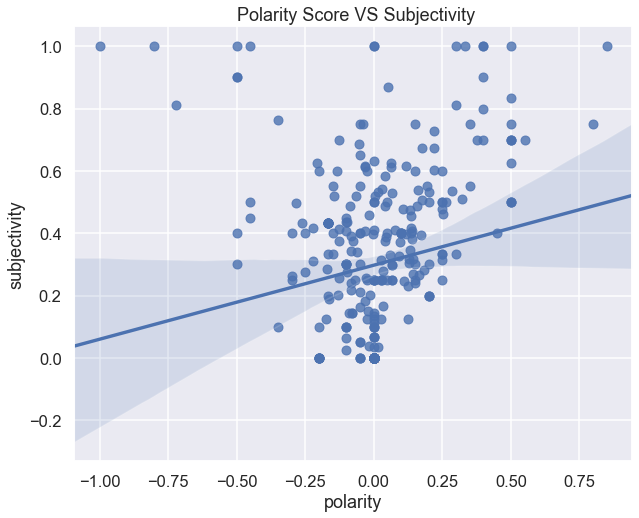

In [48]:
sns.set_context("talk")
fig,ax=plt.subplots(figsize=(10,8))
g2=sns.regplot(x="polarity", y="subjectivity",data=subset)
g2.set_title(" Polarity Score VS Subjectivity")

Text(0.5, 1.05, 'Retweet Count VS Tweet Sentiment')

<Figure size 1440x360 with 0 Axes>

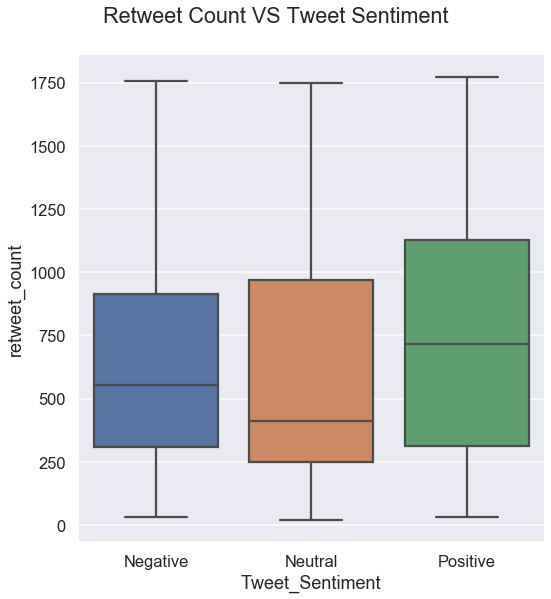

In [80]:
# It looks like people like controversy. Tweets are either negative or positive are more likely to
#be liked or retweeted. 
sns.set_context("talk")
plt.figure(figsize=(20,5))
g3=sns.catplot(data=subset.loc[subset["retweet_count"]<1800],x="Tweet_Sentiment",y="retweet_count",kind="box",height=8)
g3.fig.suptitle("Retweet Count VS Tweet Sentiment",y=1.05,x=0.5)

Text(0.5, 1.05, 'Retweet Count VS Tweet Sentiment')

<Figure size 1440x360 with 0 Axes>

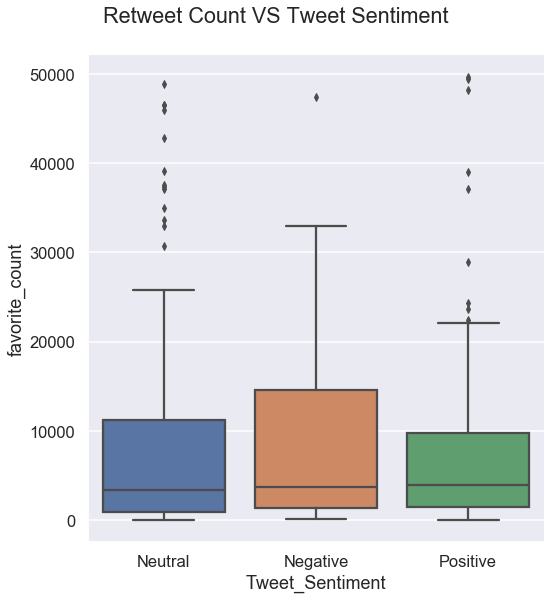

In [90]:
sns.set_context("talk")
plt.figure(figsize=(20,5))
g3=sns.catplot(data=subset.loc[subset["favorite_count"]<50000],x="Tweet_Sentiment",y="favorite_count",kind="box",height=8)
g3.fig.suptitle("Favorite Count VS Tweet Sentiment",y=1.05,x=0.5)

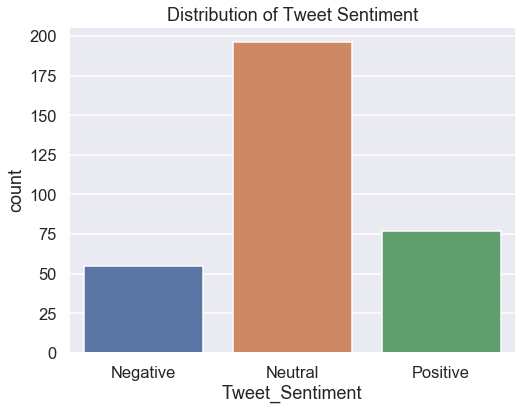

In [81]:
fig,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(data=subset,x="Tweet_Sentiment")
ax.set_title("Distribution of Tweet Sentiment")
plt.show()

In [ ]:
#Retweet 1800 and above
#Favorite 50000 and above

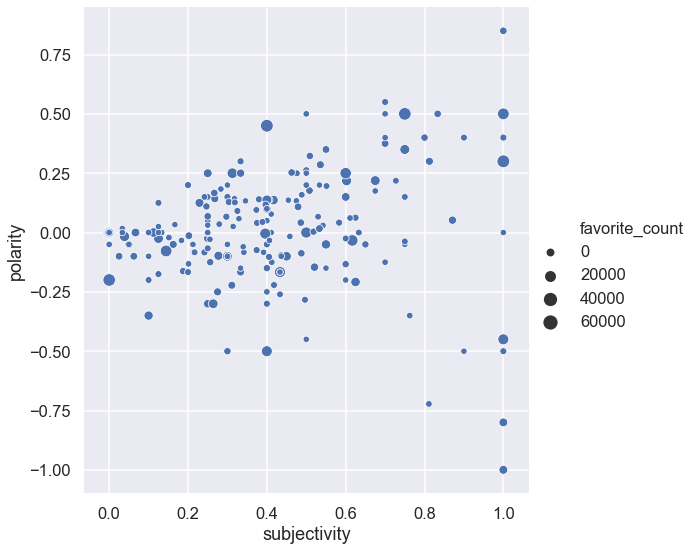

In [87]:
sns.relplot(data=subset.loc[subset["favorite_count"]<50000],x="subjectivity",y="polarity",kind="scatter",size="favorite_count",height=8)

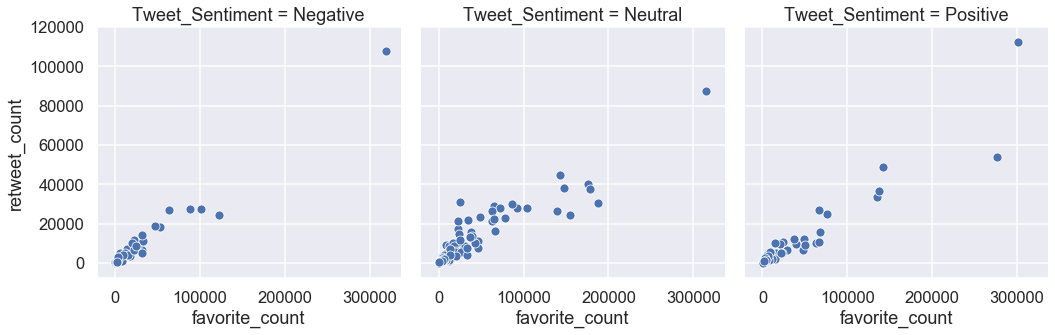

In [91]:
sns.relplot(data=subset,x="favorite_count",y="retweet_count",kind="scatter",col="Tweet_Sentiment")

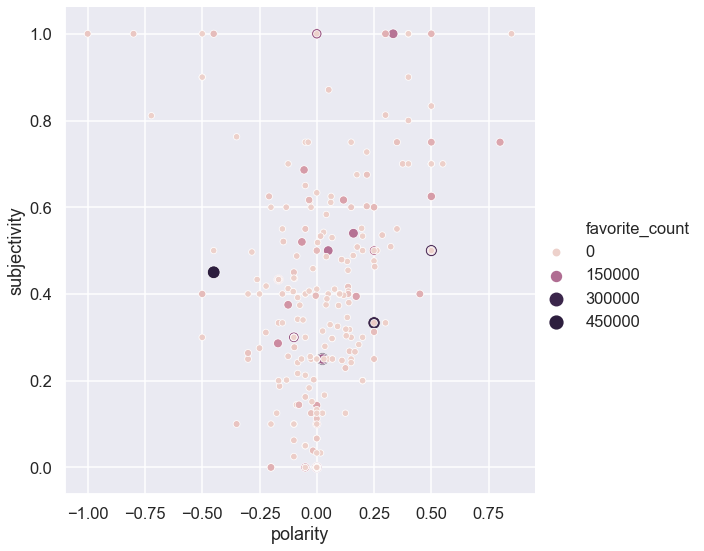

In [98]:
sns.relplot(data=subset,x="polarity",y="subjectivity",size="favorite_count",hue="favorite_count",\
            kind="scatter",height=8)
ax.set_ylabel("<---Negative---Polarity---Positive--->",fontsize=20)
plt.show()

In [105]:
subset["date"]=pd.to_datetime(subset["created_at"])

In [109]:
subset["date"].min()
subset["date"].max()
midpoint=datetime.date(2020,6,11)

In [156]:
roll_5_polarity=subset[["created_at","polarity"]]
roll_5_polarity.set_index("created_at")
roll_5_polarity.plot()
roll_5_polarity.rolling(window=50).mean().plot()

In [153]:
roll_5_polarity=subset[["date","polarity"]]
#roll_5_polarity["date"]=roll_5_polarity["date"].dt.date
roll_5_polarity.set_index("date")
roll_5_polarity.plot()
roll_5_polarity.rolling(window=20).mean().plot()

KeyError: "['date'] not in index"

In [38]:
sns.relplot(data=subset[subset["date"]>midpoint],x="date",y="polarity",kind="line",ax=ax)
ax.set_ylabel("<---Negative-------Positive--->",fontsize=20)
ax.set_xlabel("Tweet Date",fontsize=20)
ax.set_xticklabels(subset[subset["date"]>midpoint]["time"],rotation=90)
ax.set_title("Polarity Score of Tweets: Negative=-1,Positive=+1",fontsize=20)
plt.show()

KeyError: 'date'